In [1]:
import warnings
import pandas as pd
import numpy as np
import pandas_profiling
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion

d:\Downloads\New folder\envs\credit_risk\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
d:\Downloads\New folder\envs\credit_risk\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [2]:
#Uncomment and run if you want to generate the profile report
bureau_balance = pd.read_csv(r"d:\NEU\Credit-Risk-Analysis\data\dseb-63-data-preparation-final-project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau_balance.csv")
# bureau_balance_profile = bureau_balance.profile_report(title="Bureau balance dataset report")
# bureau_balance_profile

### Observation from the report
- The shape of bureau_balance.csv is (27299925, 3)
- The number of missing values in bureau_balance.csv is 0
- The number of duplicate values in bureau_balance.csv is 0
-This table contains the monthly status for each of the previous loan for a particular applicant reported by the Credit Bureau Department.
There are 8 unique values for the STATUS which are encoded. Each of them have a special meaning. 
C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off.
- The most earliest month's balance that we have is the 96 months back status, i.e. the Status has been provided upto 8 years of history for loans for which those exist.

- Most of the loans are Closed in the Credit Bureau, which is followed by clients with 0 DPD and then by applicants whose status is unknown.
- We can conclude that there are very few annuity defaulters in the data.

# Understanding of variables
SK_BUREAU_ID - Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table

MONTHS_BALANCE - Month of balance relative to application date (-1 means the freshest balance date)

STATUS - Status of Credit Bureau loan during the month (active, closed, DPD0-30,… [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] )

# EDA

## MERGE with TARGET columns in application_train.csv to get more insights

In [3]:
bureau = pd.read_csv(r"d:\NEU\Credit-Risk-Analysis\data\dseb-63-data-preparation-final-project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau.csv")
application_train = pd.read_csv(r"d:\NEU\Credit-Risk-Analysis\data\dseb-63-data-preparation-final-project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv")
data_merged_prev = pd.merge(bureau[['SK_ID_CURR','SK_ID_BUREAU']], bureau_balance, how= 'left', on=['SK_ID_BUREAU'])
data_merged = pd.merge(application_train[["SK_ID_CURR", "TARGET"]], data_merged_prev, how='left', on=['SK_ID_CURR'])


## Months_balance

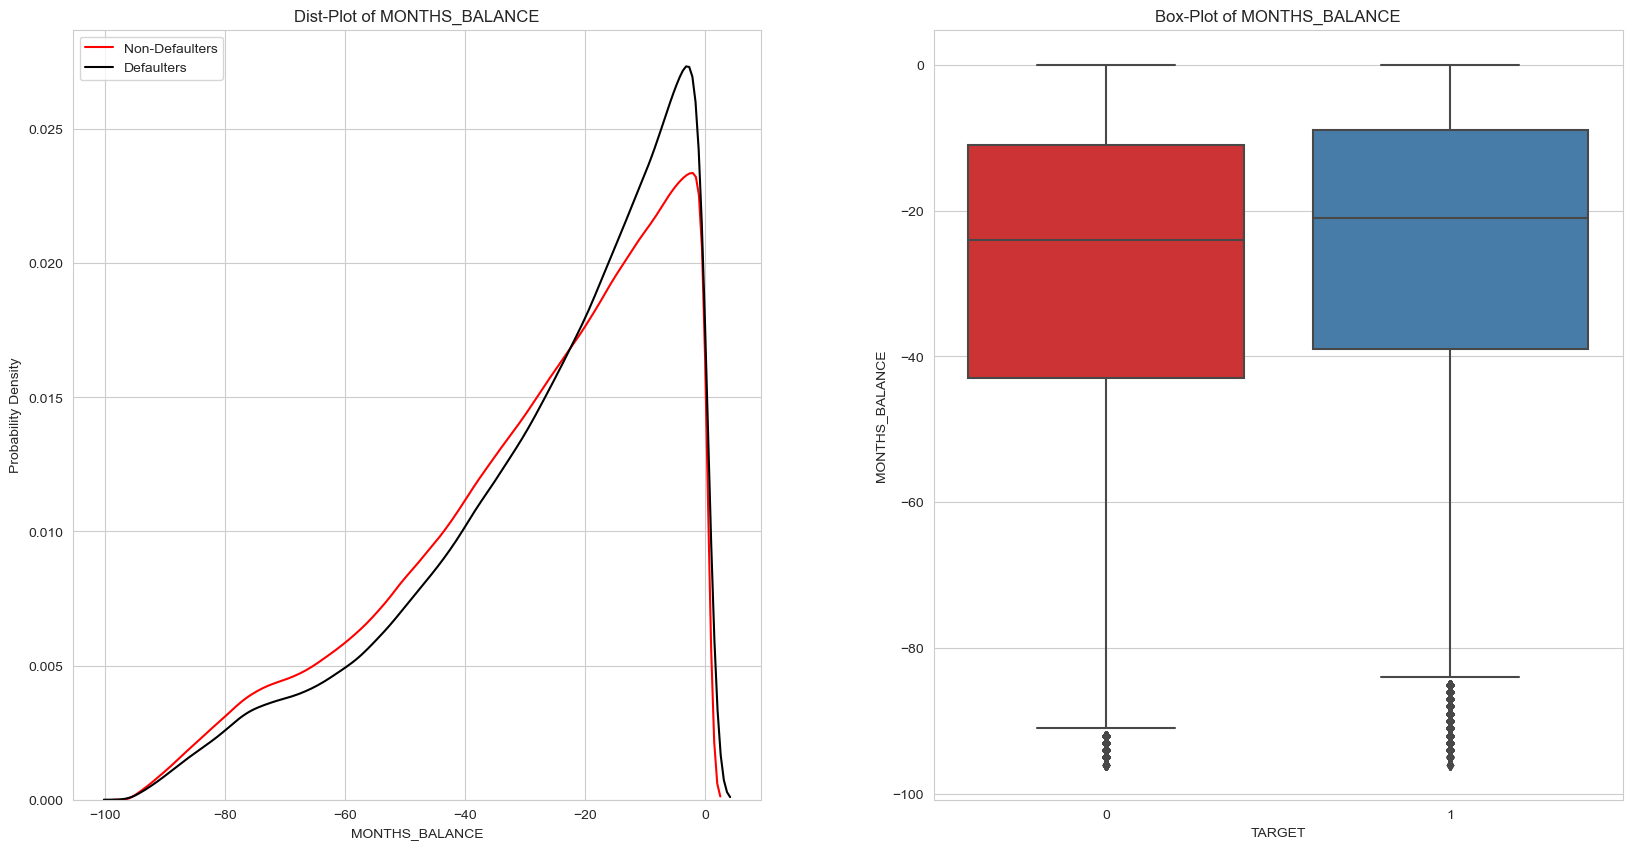

In [4]:
plot_continuous_variables(data_merged, 'MONTHS_BALANCE', plots=['distplot','box'], figsize=(20,10))

Total Number of unique categories of STATUS = 9


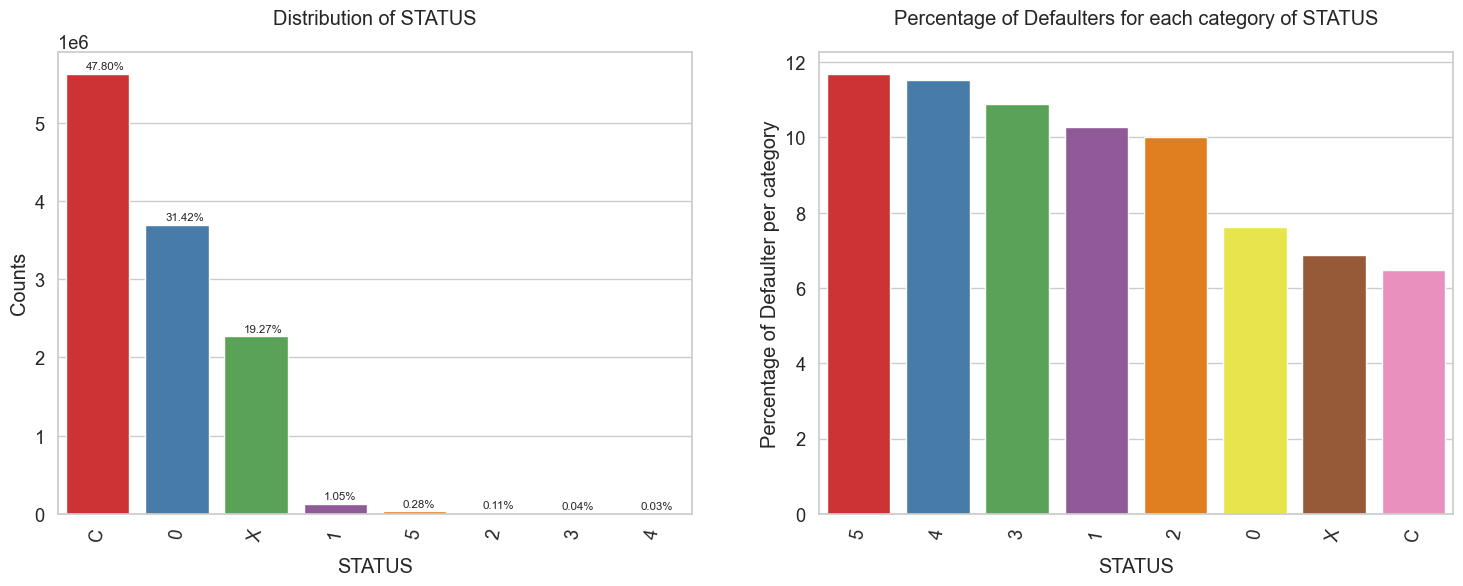

In [5]:
plot_categorical_variables_bar(data_merged,'STATUS',rotation=80, horizontal_adjust=0.25 )

There are 13,646,993 debts in closed status remaining, nearly 7,500,000 debts are not paid according to the arranged schedule and are subject to late fees, and there are more than 5,800,000 debts that are still outstanding. The situation has not been clearly determined.
​

## Number of Status of each customers

In [6]:
grp = data_merged[['SK_ID_CURR', 'STATUS', 'TARGET']].groupby(['SK_ID_CURR','TARGET'])['STATUS'].nunique().reset_index()
grp = grp[grp['STATUS'] != 0]


In [7]:
grp

,SK_ID_CURR,TARGET,STATUS
1,1,1,2
7,8,1,7
10,11,0,4
16,20,0,3
17,21,0,4
...,...,...,...
245995,307494,0,3
245997,307496,0,2
246000,307501,0,3
246004,307505,0,2


Total Number of unique categories of STATUS = 8


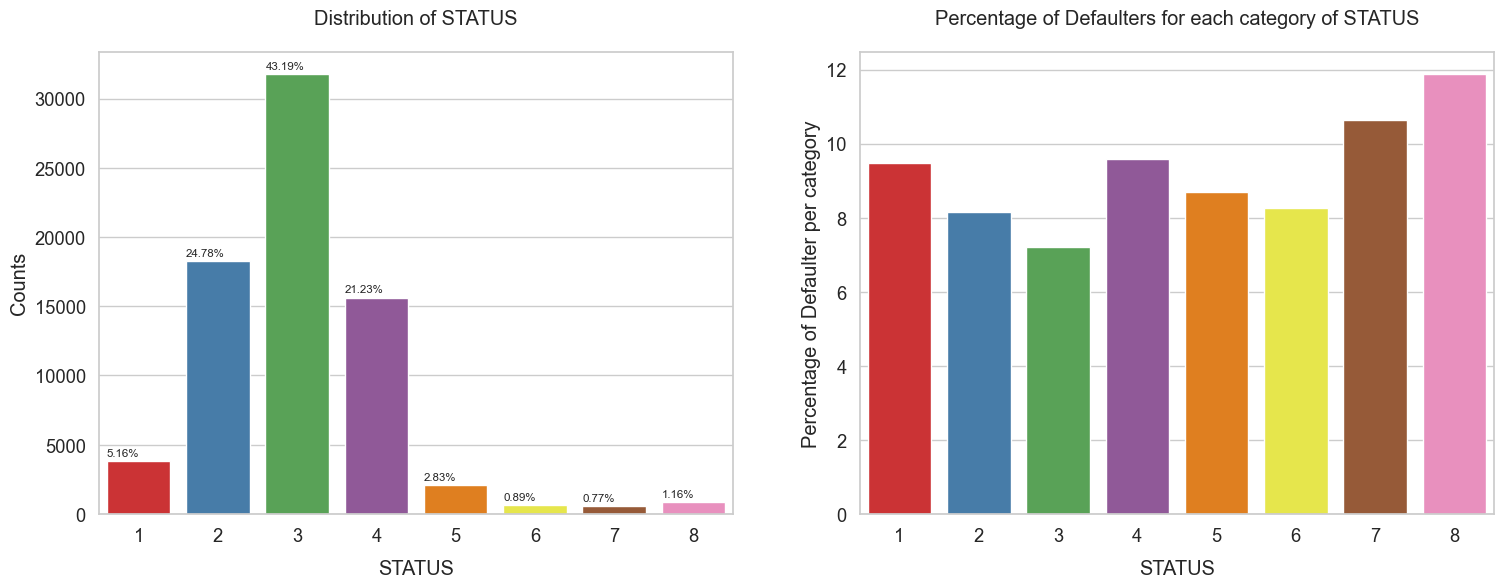

In [8]:
plot_categorical_variables_bar(grp, 'STATUS')

The factor of the number of statuses does not affect whether customers have difficulty repaying debt or not because the distribution is very similar.